In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline 

font = {'family': 'Times New Roman',
        'weight': 'normal', 'size':36}
plt.rc('font', **font)

(35, 0)

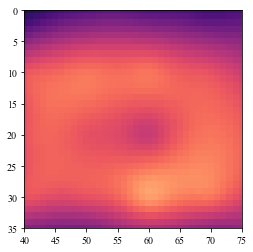

In [2]:
from scipy.interpolate import Rbf
#start - 0, 0
# good - 7,5
matrix= [  [0,0,0,0,0,0,0,0],
         [0, 6, 6,0 ,5,6,6,5],
         [0, 6, 6,0 ,5,5,4,6],
         [0,0,7,0,5,5,7,6],
             [0,0,9,7,0,0,0,0],
         [0,0,0,9,7,7,7,7],
         [0,0,0,9,0,0,0,0],
         [0,0,0,0,0,0,0,0]
        ]

x, y, z = [], [], []
for i in xrange(8):
    for j in xrange(8):
        x.append(i*10)
        y.append(j*10)
        z.append(((matrix[i][j]*1.0/9)))
                 
        
z = np.array(z)
low = np.where(z<0.1)
z[low] = np.random.randn(*z[low].shape)*0.1               
ti = range(80)
XI, YI = np.meshgrid(ti, ti)
rbf = Rbf(x, y, z, epsilon=2)
sz = 80
#z = rbf(x,y)
z = rbf(XI,YI)
"""
cmaps['Perceptually Uniform Sequential'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']

cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
            """
plt.imshow(z.reshape(sz,sz).T, cmap='magma')
plt.ylim((sz,0))
#plt.imshow((np.array(matrix)*1.0/9)**0.5,  interpolation='bicubic')
#plt.rcParams['figure.figsize'] = (10, 10)
low = np.where(z<0.1)

plt.xlim((40,75))
plt.ylim((35 ,0))


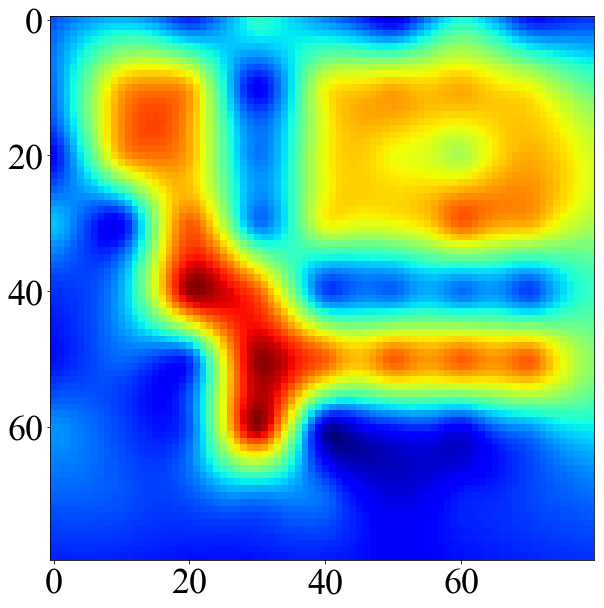

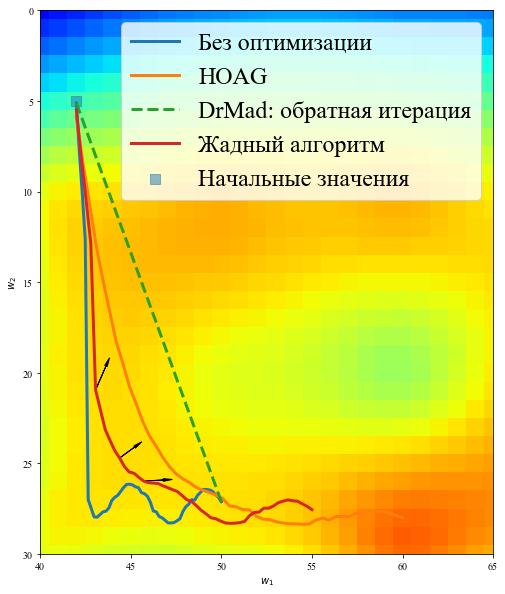

In [4]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.imshow(z.reshape(sz,sz).T, cmap='jet')
plt.xlim((40, 65))
plt.ylim((30 ,0))
from scipy.interpolate import interp1d

simpleX = [42,42.5, 42.6,   43, 50]
simpleY = [5,12, 26, 27,27.5]
interplt = interp1d(simpleX, simpleY, 'linear')
simpleX= np.linspace(42.0,50.0,50)
simpleY = interplt(simpleX) + np.sin(simpleX*1.5+np.random.randn(simpleX.shape[0])*0.1)
plt.plot(simpleX, simpleY, label=u'Без оптимизации', lw=3)
HOAGX = [42,43, 47,   50, 60]
HOAGY = [5,12, 26, 27,29.0]
interplt = interp1d(HOAGX, HOAGY, 'quadratic')
HOAGX= np.linspace(42.0,60.0,50)
HOAGY = interplt(HOAGX) + np.sin(HOAGX*0.5+np.random.randn(simpleX.shape[0])*0.1)
plt.plot(HOAGX, HOAGY, label='HOAG', lw=3)

plt.plot([simpleX[0], simpleX[-1]],[simpleY[0], simpleY[-1]], label=u'DrMad: обратная итерация', ls='--', lw=3)

greedX = simpleX*0.5+HOAGX*0.5
greedY = simpleY*0.5+HOAGY*0.5
#plt.plot(simpleX, simpleY)
#plt.plot(HOAGX, HOAGY)
plt.plot(greedX, greedY, label=u'Жадный алгоритм', lw=3)
step = 0
for h1,h2, g1, g2 in zip(HOAGX[2:], HOAGY[2:], greedX, greedY):
    step +=1
    if step%5==0 and step<20:
        plt.arrow(g1, g2,(h1-g1)*0.5,(h2-g2)*0.5, fc="k", ec="k", 
             head_width=0.15, head_length=0.5)

plt.scatter([42],[5], marker='s', s=100, alpha=0.5, label=u'Начальные значения')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.rcParams['legend.numpoints'] = 1
plt.legend(loc='best', fontsize=24, numpoints=1, scatterpoints=1,)
plt.savefig('../hyperparams/Fig_traj.eps')


9526.88905768509

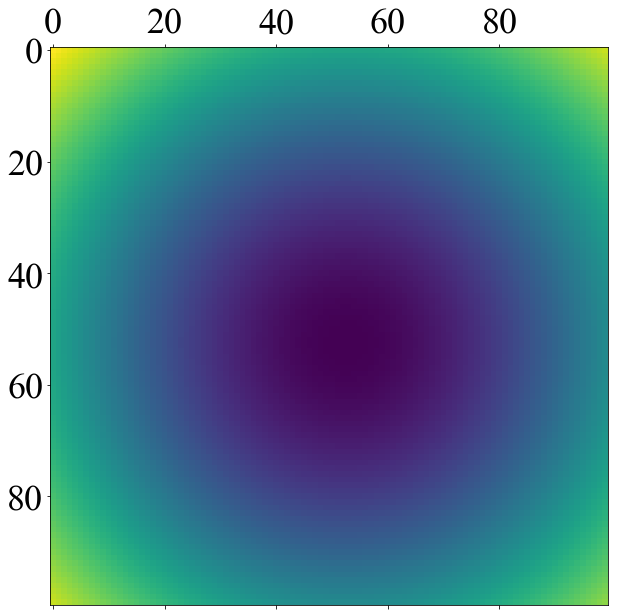

In [8]:
matrix = np.zeros((100, 100))
c1 = 100
c2 =  0
for i in xrange(0, 100):
    for j in xrange(0,100):
        matrix[i,j] = (np.linalg.norm(np.array([i,j]) - np.array([c1,c1]))+0.1)**2 + \
        0.9*(0.1+np.linalg.norm(np.array([i,j]) - np.array([c2,c2])))**2
plt.matshow(matrix**0.1)
matrix[50,50]

Text(0,0.5,'$w_2$')

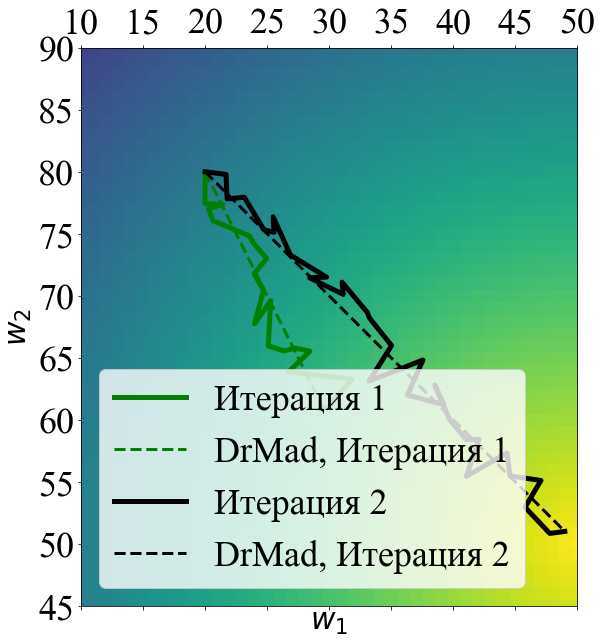

In [9]:
matrix = np.zeros((100, 100))
for i in xrange(0, 100):
    for j in xrange(0,100):
        matrix[i,j] = -np.linalg.norm(np.array([i,j]) - np.array([50,50]))
plt.matshow(matrix)

path = np.arange(20,30, 0.5), np.arange(80, 60, -1.0)
#plt.plot([20,40], [80,50])
plt.plot(path[0]+np.random.randn(20)*([0.0]+[1.0]*18+[0.0]), path[1]+np.random.randn(20)*([0.0]+[1.0]*18+[0.0]), c='g', label=u'Итерация 1', lw=5)
plt.plot(path[0], path[1], c='g', ls='--', label=u'DrMad, Итерация 1' , lw=3)

path = np.arange(20,50, 1.0), np.arange(80, 50, -1.0)
plt.plot(path[0]+np.random.randn(30)*([0.0]+[1.0]*28+[0.0]), path[1]+np.random.randn(30)*([0.0]+[1.0]*28+[0.0]), c='k',  label=u'Итерация 2', lw=5)
plt.plot(path[0], path[1], c='k', ls='--', label=u'DrMad, Итерация 2' , lw=3)


plt.rcParams['figure.figsize'] = (20, 20)
plt.legend(loc='best')
plt.xlim(10,50)
plt.ylim(45,90)
plt.xlabel('$w_1$', fontsize=30)
plt.ylabel('$w_2$', fontsize=30)

Text(0,0.5,'$w_2$')

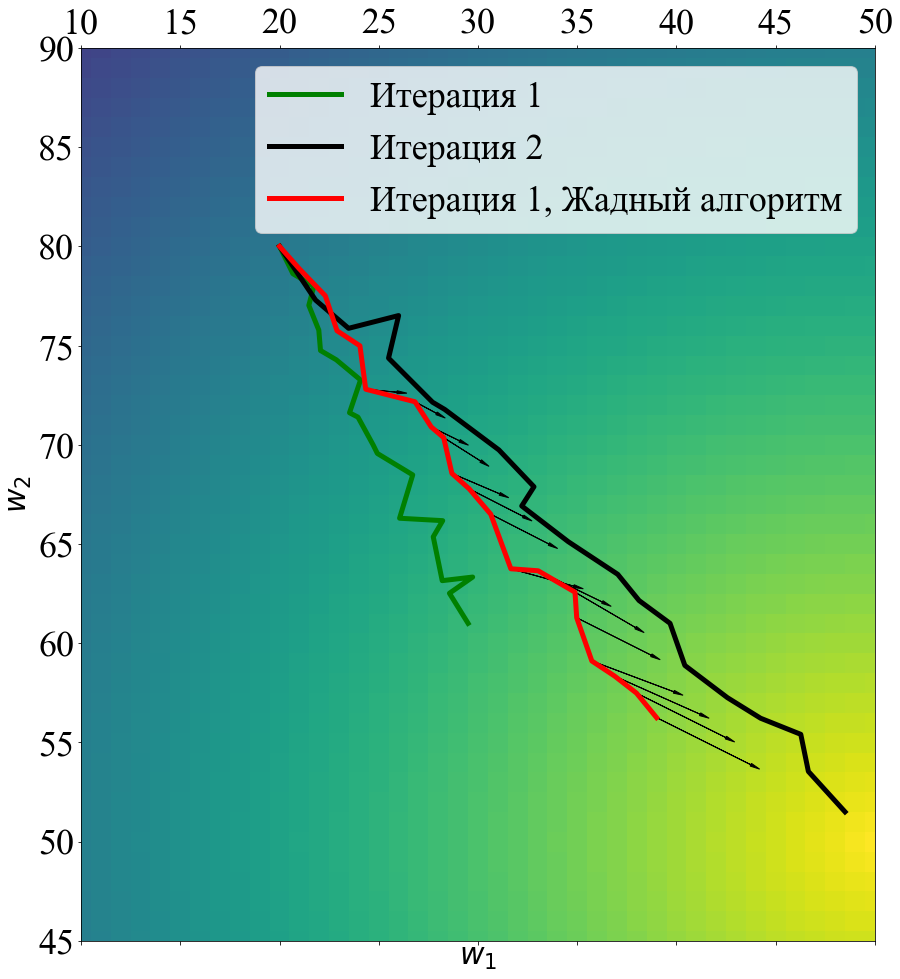

In [10]:
matrix = np.zeros((100, 100))
for i in xrange(0, 100):
    for j in xrange(0,100):
        matrix[i,j] = -np.linalg.norm(np.array([i,j]) - np.array([50,50]))
plt.matshow(matrix)

path1 = np.arange(20,30, 0.5), np.arange(80, 60, -1.0)

plt.plot(path1[0]+np.random.randn(20)*([0.0]+[0.5]*18+[0.0]), path1[1]+np.random.randn(20)*([0.0]+[0.5]*18+[0.0]), c='g', label=u'Итерация 1', lw=5)
#plt.plot(path[0], path[1], c='g', ls='--', label=u'DrMad, Итерация 1' , lw=3)

path2 = np.arange(20,50, 1.5), np.arange(80, 50, -1.5)
plt.plot(path2[0]+np.random.randn(20)*([0.0]+[0.5]*18+[0.0]), path2[1]+np.random.randn(20)*([0.0]+[0.5]*18+[0.0]), c='k',  label=u'Итерация 2', lw=5)
#plt.plot(path[0], path[1], c='k', ls='--', label=u'DrMad, Итерация 2' , lw=3)

path =  0.5*np.array(path1) + 0.5* np.array(path2) 
path[0] = path[0] +np.random.randn(20)*([0.0]+[0.5]*18+[0.0])
path[1] = path[1] +np.random.randn(20)*([0.0]+[0.5]*18+[0.0])
plt.plot(path[0], path[1], c='r', label=u'Итерация 1, Жадный алгоритм', lw=5)
for i in xrange(5,20):
    plt.arrow(path[0][i],path[1][i], (path2[0][i] - path[0][i])*0.5, 0.5*(path2[1][i] -path[1][i]), fc="k", ec="k", 
             head_width=0.15, head_length=0.5 )
    

plt.rcParams['figure.figsize'] = (20, 20)
plt.legend(loc='best')
plt.xlim(10,50)
plt.ylim(45,90)
plt.xlabel('$w_1$', fontsize=30)
plt.ylabel('$w_2$', fontsize=30)